## Simpsons characters classification 

In this notebook we try to classify images of different simpsons characters. The characters are 'abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson', 'charles_montgomery_burns', 'chief_wiggum', 'homer_simpson', 'krusty_the_clown', 'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders', 'principal_skinner' and 'sideshow_bob'.
This dataset was preprocessed in an other notebook, it is splitted into a train val and testset and resized into 80x80 pixels and all characters have more than 600 images in total. The whole dataset with the original size can be found here https://www.kaggle.com/alexattia/the-simpsons-characters-dataset. 

#### Imports

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import os

In [0]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical


In [0]:
os.getcwd()


'/content'

In [0]:
Data=pd.read_csv("/content/drive/My Drive/Data.csv")

X_train=np.load("/content/drive/My Drive/X_train.npy")
Y_train=np.load("/content/drive/My Drive/Y_train.npy")

X_val=np.load("/content/drive/My Drive/X_val.npy")
Y_val=np.load("/content/drive/My Drive/Y_val.npy")

X_test=np.load("/content/drive/My Drive/X_test.npy")
Y_test=np.load("/content/drive/My Drive/Y_test.npy")

labels=Data["label"].unique()

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(9637, 80, 80, 3)
(4131, 80, 80, 3)
(3442, 80, 80, 3)
(9637, 14)
(4131, 14)
(3442, 14)


Let's use the trainset to plot a random image of each character. You can see that the characters are easy recognizable. And all images are the same size.

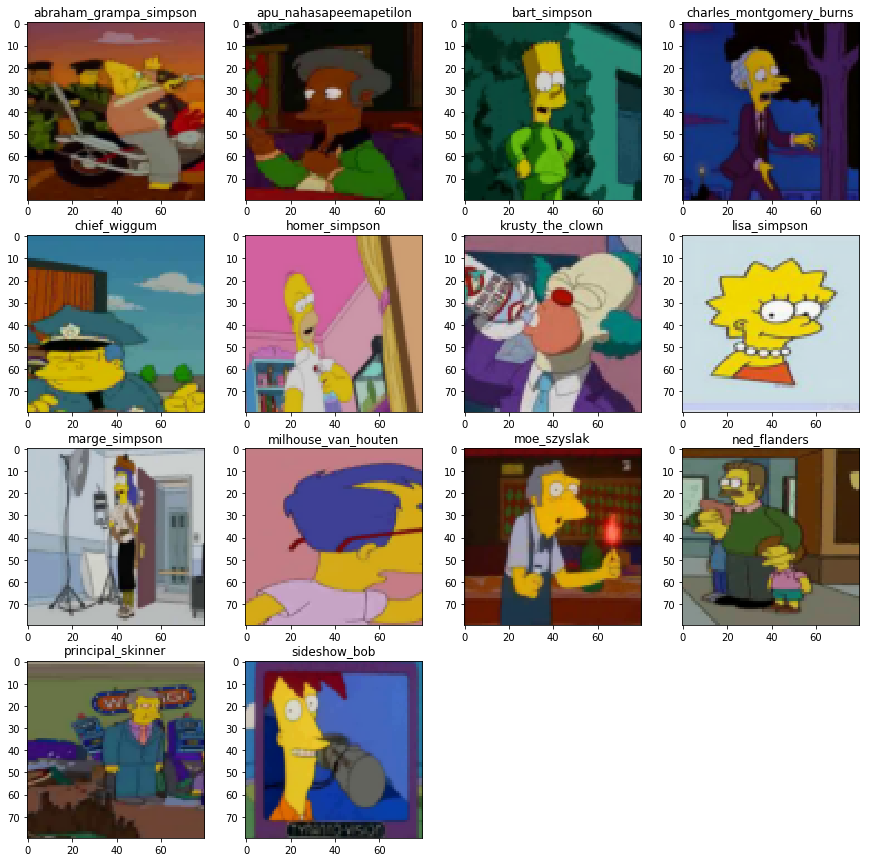

In [0]:
plt.figure(figsize=(15,15))
for i in range(0,len(np.unique(np.argmax(Y_train,axis=1)))):
    rmd=np.random.choice(np.where(np.argmax(Y_train,axis=1)==i)[0],1)
    plt.subplot(4,4,i+1)
    img=X_train[rmd]
    plt.imshow(img[0,:,:,:])
    plt.title(labels[i])

In this cell we plot the label distribution of all sets. You clearly see that the label distribution in all sets is very similar. The biggest class in the trainigset is obviously homer and the smallest class is apu.

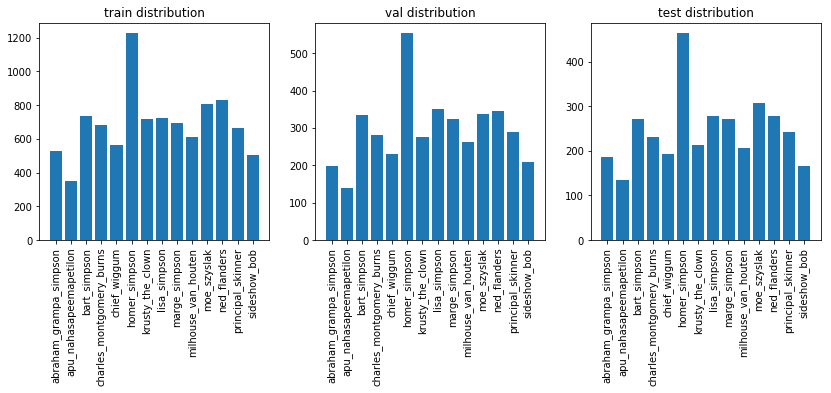

In [0]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.bar(np.unique(np.argmax(Y_train,axis=1),return_counts=True)[0],np.unique(np.argmax(Y_train,axis=1),return_counts=True)[1]
       ,tick_label=labels )
plt.xticks(rotation=90)
plt.title("train distribution")
plt.subplot(1,3,2)
plt.bar(np.unique(np.argmax(Y_val,axis=1),return_counts=True)[0],np.unique(np.argmax(Y_val,axis=1),return_counts=True)[1]
       ,tick_label=labels )
plt.xticks(rotation=90)
plt.title("val distribution")
plt.subplot(1,3,3)
plt.bar(np.unique(np.argmax(Y_test,axis=1),return_counts=True)[0],np.unique(np.argmax(Y_test,axis=1),return_counts=True)[1]
       ,tick_label=labels )
plt.xticks(rotation=90)
plt.title("test distribution")
plt.show()

### CNN

Now we normalize the data and use a CNN to classify the images into the right simpson character.

In [0]:
X_train=np.array(X_train,dtype="float32")
X_train=((X_train/255)-0.5)*2

X_val=np.array(X_val,dtype="float32")
X_val=((X_val/255)-0.5)*2

X_test=np.array(X_test,dtype="float32")
X_test=((X_test/255)-0.5)*2

In [0]:

model  =  Sequential()

model.add(Conv2D(16,(3,3),activation="relu",padding="same",input_shape=(80,80,3)))
model.add(Conv2D(16,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(14))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 80, 80, 16)        448       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 80, 80, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               12800500  
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)              

In [0]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val),verbose=2,batch_size=128)


Train on 9637 samples, validate on 4131 samples
Epoch 1/10
9637/9637 - 5s - loss: 2.6982 - acc: 0.2041 - val_loss: 2.0628 - val_acc: 0.3481
Epoch 2/10
9637/9637 - 4s - loss: 1.6763 - acc: 0.4813 - val_loss: 1.5756 - val_acc: 0.5076
Epoch 3/10
9637/9637 - 5s - loss: 1.2028 - acc: 0.6328 - val_loss: 1.2775 - val_acc: 0.6144
Epoch 4/10
9637/9637 - 4s - loss: 0.8909 - acc: 0.7276 - val_loss: 1.2529 - val_acc: 0.6209
Epoch 5/10
9637/9637 - 4s - loss: 0.6317 - acc: 0.8141 - val_loss: 1.1704 - val_acc: 0.6592
Epoch 6/10
9637/9637 - 4s - loss: 0.4017 - acc: 0.8861 - val_loss: 1.1980 - val_acc: 0.6773
Epoch 7/10
9637/9637 - 5s - loss: 0.2245 - acc: 0.9413 - val_loss: 1.3360 - val_acc: 0.6628
Epoch 8/10
9637/9637 - 5s - loss: 0.1148 - acc: 0.9772 - val_loss: 1.4753 - val_acc: 0.6863
Epoch 9/10
9637/9637 - 5s - loss: 0.0505 - acc: 0.9917 - val_loss: 1.4957 - val_acc: 0.6885
Epoch 10/10
9637/9637 - 4s - loss: 0.0268 - acc: 0.9965 - val_loss: 1.6913 - val_acc: 0.6851


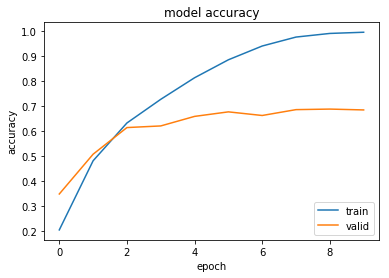

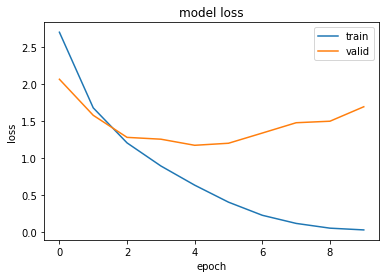

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

### Evaluate
Lets check the overall accuracy and the accuracy per class.


In [0]:
acc=np.average(model.predict_classes(X_test)==np.argmax(Y_test,axis=1))
res = pd.DataFrame({'Acc' : acc}, index=['CNN'])
res

,Acc
CNN,0.679256


In [0]:
pred=np.argmax(model.predict(X_test),axis=1)
for i in range(0,len(labels)):
  print(labels[i],np.average(pred[np.where(np.argmax(Y_test,axis=1)==i)]==i))

abraham_grampa_simpson 0.7150537634408602
apu_nahasapeemapetilon 0.7555555555555555
bart_simpson 0.6544117647058824
charles_montgomery_burns 0.47186147186147187
chief_wiggum 0.7150259067357513
homer_simpson 0.7564655172413793
krusty_the_clown 0.7464788732394366
lisa_simpson 0.3906810035842294
marge_simpson 0.7564575645756457
milhouse_van_houten 0.6067961165048543
moe_szyslak 0.6503267973856209
ned_flanders 0.8243727598566308
principal_skinner 0.7883817427385892
sideshow_bob 0.6626506024096386


### Now it's your turn



*   Try to fight the overfitting.
*   Try to improve the performace on the testset with a different model.  
*   *Hints:  You may want to use a deeper CNN, or use transfer learnung. Maybe data augmntation could improve the performace or dropout could help to fight the overfitting.*


*   Try beat 95% overall accuracy ;-)
